<a href="https://colab.research.google.com/github/ahmedshaik982/EDA_On_Airbnb_Bookings_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **PROBLEM STATEMENT**

 *   **For this project, we will be analyzing Airbnb’s New York City(NYC) data of 2019.  This dataset contains listings information such as listing name, host name, minimum night stays, availability, area, reviews etc.**
  



 *   **Our main objective behind this project is to explore and analyze the data to discover the key understandings. For this, we will explore and visualize the dataset from Airbnb in NYC using basic exploratory data analysis techniques.**



**Importing dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting to drive for reading the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Inspection**

In [3]:
# Reading the data
data = pd.read_csv('/content/drive/My Drive/files/airbnb.csv')

In [4]:
# Displaying the top 5 rows of our data
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Shape of the data
data.shape

(48895, 16)

In [6]:
# Total column names 
col = data.columns
col

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Understanding the columns**


*   id - Unique id of listing
*   name - Name of the listing

*   host_id - Unique id of host

*   host_name - Name of the host
*   neighbourhood_group - Location


*   neighbourhood - Area


*   latitude - Latitude of listing

*   longitude - Longitude of listing

*   room_type - Type of rooms

*   price - Price of listing
*   minimum_nights - Minumum number of nights people stay


*   number_of_reviews - No. of reviews given for listing 


*   last_review - Latest review given for listing


*   reviews_per_month - No.of review given per month

*   calculated_host_listings_count - Total No. of listings for host
*   availability_365 - No. of days listing available










In [7]:
# Getting the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Checking Null values in the data
data.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
data.duplicated().value_counts()

False    48895
dtype: int64

From above observations, last_review, reviews_per_month columns have more number of null values, so we should remove them. And we are also removing latitude, longitude columns as these columns dont effect much for our analysis.

**Data Cleaning and Manipulation**

In [10]:
# Dropping unnecessary columns and storing the data into new variable
new_data = data.drop(['latitude', 'longitude', 'last_review','reviews_per_month'], axis = 1)

In [11]:
# Displaying the top 5 rows of new data 
new_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [12]:
# Dropping null values from our new data
new_data.dropna(inplace = True)

In [13]:
# Checking the info of our new data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


Hence we can observe that there are no null values in our data

**Exploratory Data Analysis**

In [14]:
# Extracting numerical features into new variable
num_feat = [f for f in new_data.columns if new_data[f].dtype != 'O']
print(f'The numerical features in the data are{num_feat}')

The numerical features in the data are['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


In [15]:
features = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price']

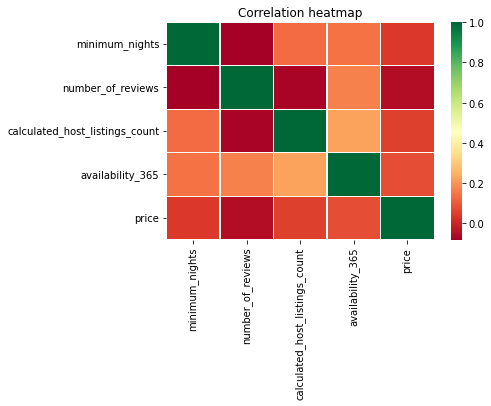

In [16]:
# Visualize the correlation between numerical features
sns.heatmap(new_data[features].corr(), fmt="",cmap='RdYlGn',linewidths=0.30)
plt.title('Correlation heatmap')
plt.show()

From the above heatmap, we can say that there are no multicollinearity variables.

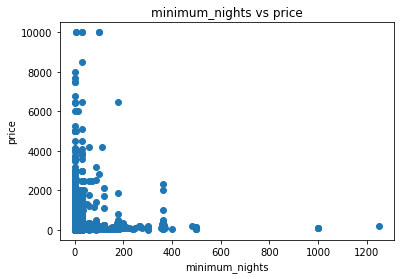

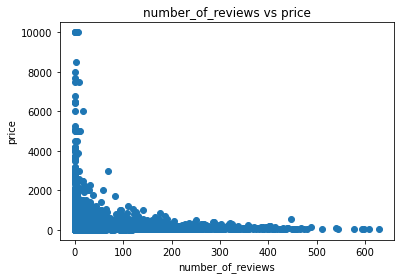

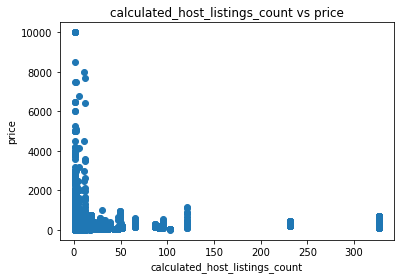

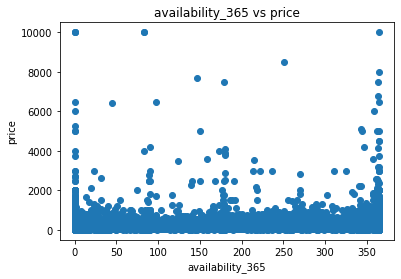

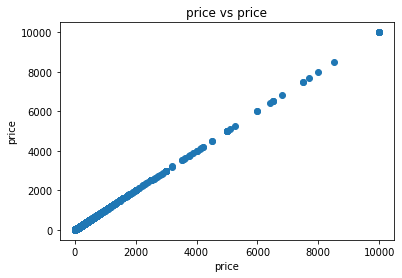

In [17]:
# lets observe relationship between some numerical features with dependent variable price
for i in features:
  plt.scatter(new_data[i], new_data['price'])
  plt.xlabel(i)
  plt.ylabel('price')
  plt.title(f'{i} vs price')
  plt.show()

From the above scatter plots we can say that most people are prefering low price listings

In [18]:
# Extracting categorical features into new variable
cat_feat = [f for f in new_data.columns if new_data[f].dtype == 'O']
print(f'The categorical features in the data are{cat_feat}')

The categorical features in the data are['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [19]:
# Unique Neighbourhood_groups 
locations_unique = new_data['neighbourhood_group'].unique()
print(f'The unique locations are {locations_unique}')

The unique locations are ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [20]:
# Unique Neighbourhoood and thier locations with number of listings
neigh = new_data.groupby(['neighbourhood', 'neighbourhood_group'])['price'].count().reset_index().sort_values(by = 'price', ascending = False)
neigh.rename(columns = {'price':'count'}, inplace = True)
neigh

,neighbourhood,neighbourhood_group,count
214,Williamsburg,Brooklyn,3917
13,Bedford-Stuyvesant,Brooklyn,3713
94,Harlem,Manhattan,2655
28,Bushwick,Brooklyn,2462
202,Upper West Side,Manhattan,1969
...,...,...,...
165,Richmondtown,Staten Island,1
215,Willowbrook,Staten Island,1
82,Fort Wadsworth,Staten Island,1
141,New Dorp,Staten Island,1


From the above dataframe, we can see there are total of 221 unique areas

In [21]:
# Finding top 10 areas with most number of listings
areas10 = neigh.head(10)
areas10

,neighbourhood,neighbourhood_group,count
214,Williamsburg,Brooklyn,3917
13,Bedford-Stuyvesant,Brooklyn,3713
94,Harlem,Manhattan,2655
28,Bushwick,Brooklyn,2462
202,Upper West Side,Manhattan,1969
95,Hell's Kitchen,Manhattan,1954
64,East Village,Manhattan,1852
201,Upper East Side,Manhattan,1797
51,Crown Heights,Brooklyn,1563
127,Midtown,Manhattan,1545


The above dataframe consists fo top 10 areas with most number of listings and their locations(neighbourhood groups)

In [22]:
# Printing top 10 areas with most number of listings
print(f"The areas with most number of listings are {areas10.loc[:, 'neighbourhood'].values}")

The areas with most number of listings are ['Williamsburg' 'Bedford-Stuyvesant' 'Harlem' 'Bushwick' 'Upper West Side'
 "Hell's Kitchen" 'East Village' 'Upper East Side' 'Crown Heights'
 'Midtown']


Text(0.5, 1.0, 'Top 10 areas vs count of listings')

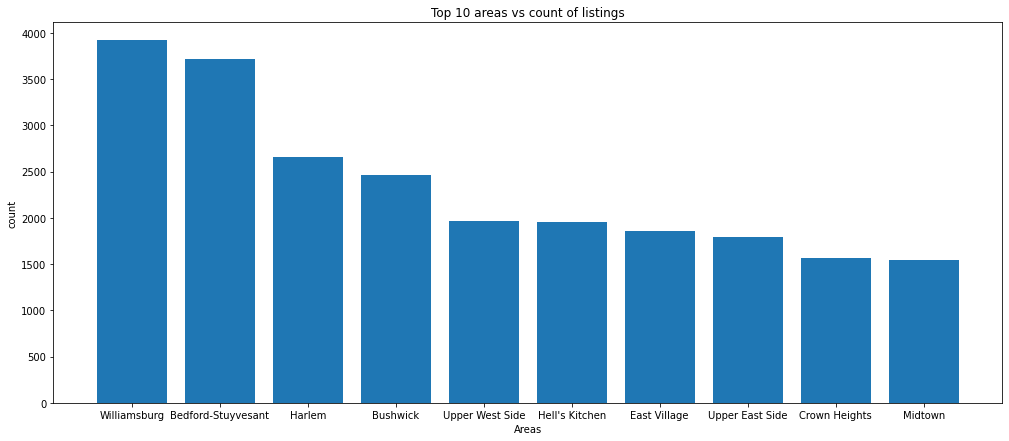

In [23]:
# Plotting above top 10 areas
plt.figure(figsize = (17,7))
plt.bar(areas10['neighbourhood'], areas10['count'])
plt.xlabel('Areas')
plt.ylabel('count')
plt.title('Top 10 areas vs count of listings')

In [24]:
# Creating Dataframe that contains unique neighbourhood_group and thier counts
locations = new_data['neighbourhood_group'].value_counts().reset_index()
locations = locations.rename(columns = {'index':'neighbourhood_group', 'neighbourhood_group':'Count'})
locations

,neighbourhood_group,Count
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


Text(0.5, 1.0, 'count of various neighbourhood groups')

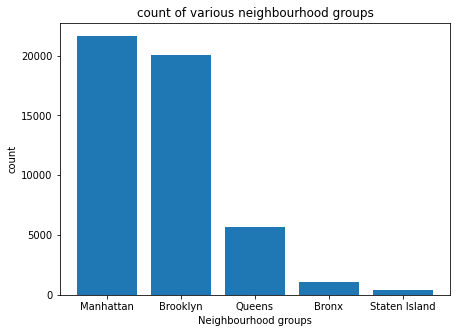

In [25]:
# Plotting above dataframe(room)
plt.figure(figsize = (7,5))
plt.bar(locations['neighbourhood_group'], locations['Count'])
plt.xlabel('Neighbourhood groups')
plt.ylabel('count')
plt.title('count of various neighbourhood groups')

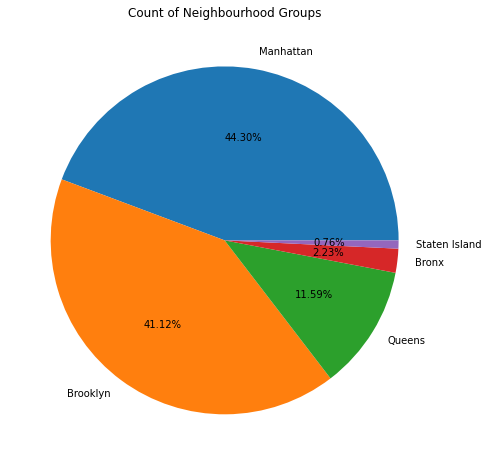

In [26]:
# Plotting pie chart for the above dataframe(area)
plt.figure(figsize = (8,8))
plt.pie(locations['Count'], labels = locations['neighbourhood_group'],  autopct='%1.2f%%')
plt.title('Count of Neighbourhood Groups')
plt.show()

From the above dataframe and visualizations, we can say that most people are prefering Manhattan(44.3%) and Brooklyn(41.12%) and least is Staten Island(0.76%)

In [27]:
# Creating Dataframe that contains unique room_type and thier counts
room = new_data['room_type'].value_counts().reset_index()
room = room.rename(columns = {'index':'room_type', 'room_type':'Count'})
room

,room_type,Count
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


Text(0.5, 1.0, 'count of various room types')

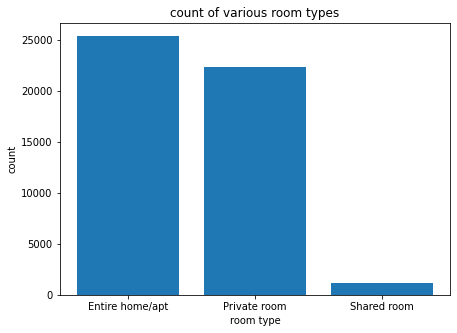

In [28]:
# Plotting above dataframe(room)
plt.figure(figsize = (7,5))
plt.bar(room['room_type'], room['Count'])
plt.xlabel('room type')
plt.ylabel('count')
plt.title('count of various room types')

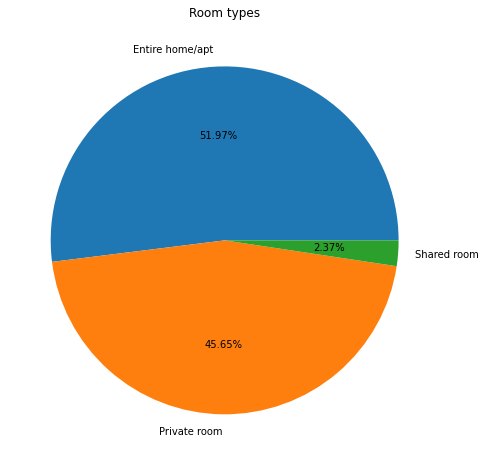

In [29]:
# Plotting pie chart for the above dataframe(room)
plt.figure(figsize = (8,8))
plt.pie(room['Count'], labels = room['room_type'],  autopct='%1.2f%%')
plt.title('Room types')
plt.show()

From the above dataframe and visualizations, we can say that most people are prefering Entire home/apt(51.97%) followed by Private room(45.65%) and least is Shared room(2.37%)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


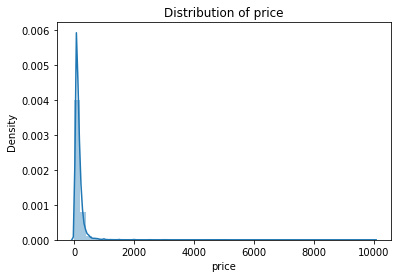

In [30]:
# Distribution of price
sns.distplot(new_data['price'])
plt.title('Distribution of price')
plt.show()

From the above plot we can observe that price is mostly in the range of 0 to 1000 and a few are in range of 1000 to 10000

In [31]:
less_than_1000 = new_data[new_data['price'] <= 1000]
more_than_1000 = new_data[new_data['price']>1000]
print(f'The number of listings with price less than 1000 are {len(less_than_1000)}')
print(f'The number of listings with price more than 1000 are {len(more_than_1000)}')

The number of listings with price less than 1000 are 48619
The number of listings with price more than 1000 are 239


In [32]:
# Calculating average price for each neighbourhood_group 
avg_price_area = data['price'].groupby(data['neighbourhood_group']).mean().reset_index()
avg_price_area = avg_price_area.sort_values(by = 'price', ascending = False)
avg_price_area

,neighbourhood_group,price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


Text(0.5, 1.0, 'Average price for each neighbourhood groups')

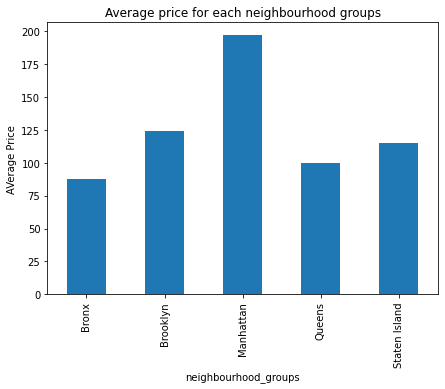

In [33]:
# Plotting above dataframe(avg_price_area)
plt.figure(figsize = (7,5))
data['price'].groupby(data['neighbourhood_group']).mean().plot.bar()
plt.xlabel('neighbourhood_groups')
plt.ylabel('AVerage Price')
plt.title('Average price for each neighbourhood groups')


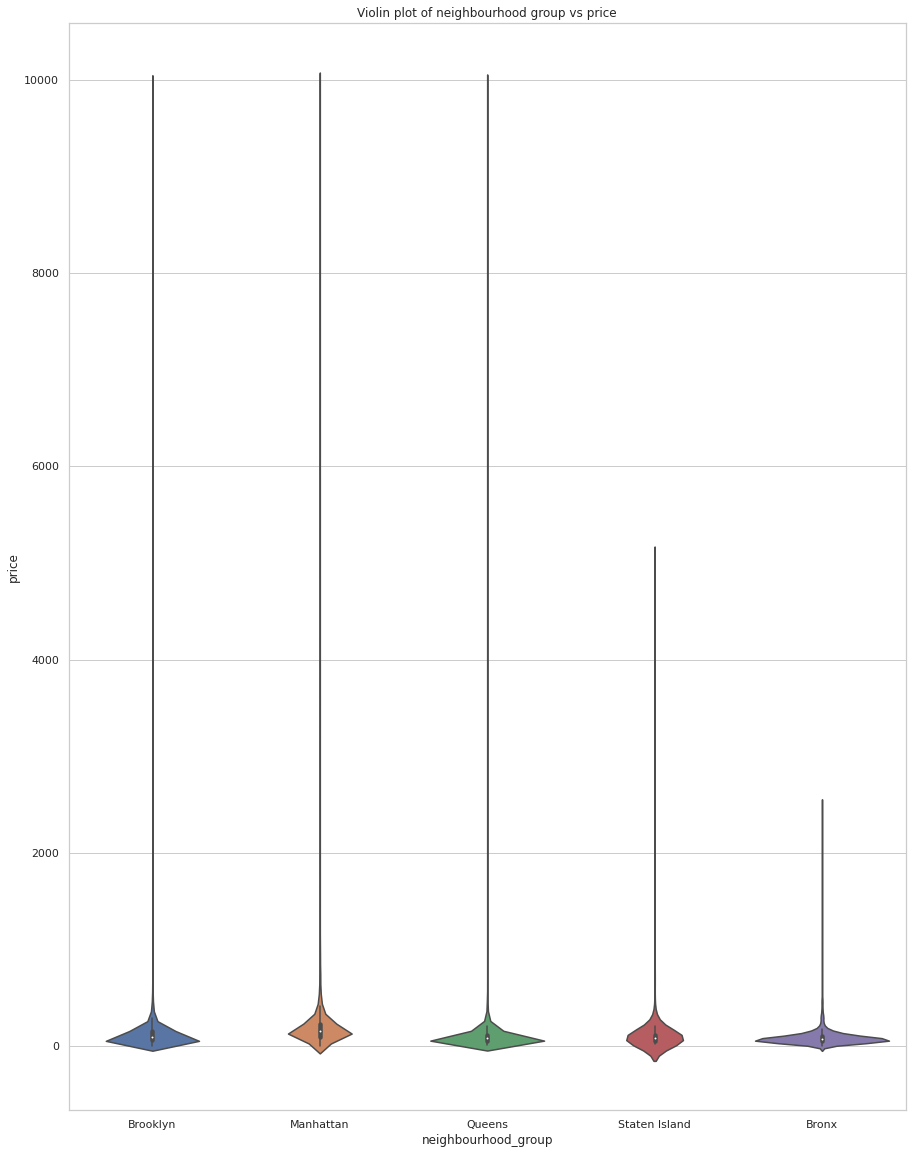

In [34]:
plt.figure(figsize = (15, 20))
sns.set(style = 'whitegrid')
sns.violinplot(x ="neighbourhood_group", y ="price", data = new_data)
plt.title('Violin plot of neighbourhood group vs price')
plt.show()

From the above dataframe and visualizations, we can say that Manhattan area has highest average price and least is Bronx

In [35]:
# Calculating average price for each room type
avg_price_room = data['price'].groupby(new_data['room_type']).mean().reset_index()
avg_price_room = avg_price_room.sort_values(by = 'price', ascending = False)
avg_price_room

,room_type,price
0,Entire home/apt,211.806994
1,Private room,89.794360
2,Shared room,70.075928


Text(0.5, 1.0, 'Average price for each room types')

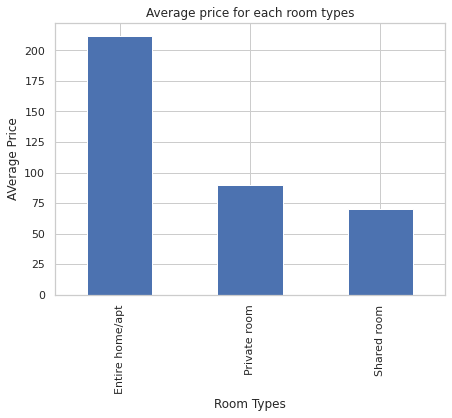

In [36]:
# Plotting above dataframe(avg_price_room)
plt.figure(figsize = (7,5))
data['price'].groupby(new_data['room_type']).mean().plot.bar()
plt.xlabel('Room Types')
plt.ylabel('AVerage Price')
plt.title('Average price for each room types')

Text(0.5, 1.0, 'Violin plot of Room types vs price')

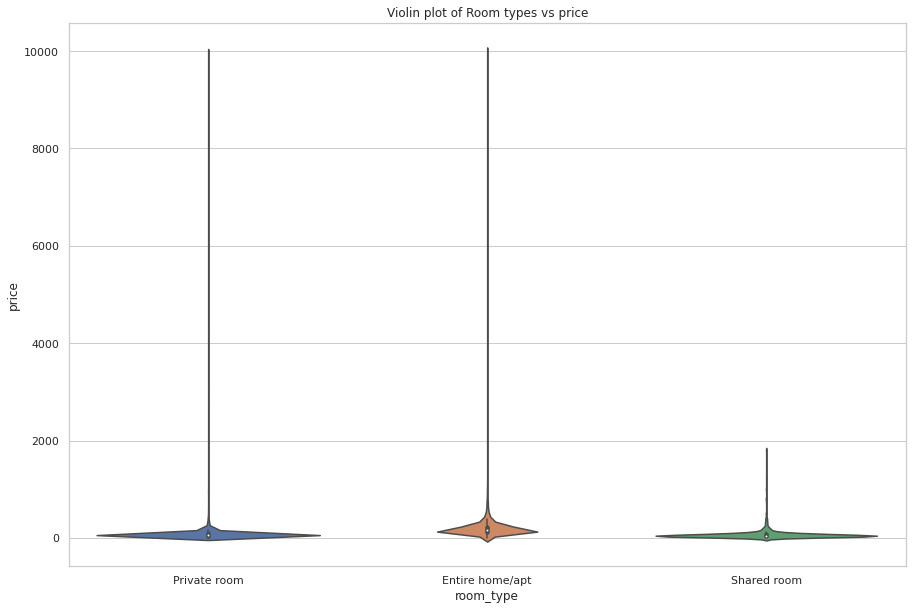

In [37]:
plt.figure(figsize = (15, 10))
sns.set(style = 'whitegrid')
sns.violinplot(x ="room_type", y ="price", data = new_data)
plt.title('Violin plot of Room types vs price')

From the above dataframe and visualizations, we can say that Entire home/apt has highest average price than others 

In [38]:
# Calculating the count of listings for each neighbourhood group
listing_area = new_data['calculated_host_listings_count'].groupby(new_data['neighbourhood_group']).count().reset_index()
listing_area = listing_area.sort_values(by = 'calculated_host_listings_count', ascending = False)
listing_area

,neighbourhood_group,calculated_host_listings_count
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


Text(0.5, 1.0, 'Count of listings for each neighbourhood groups')

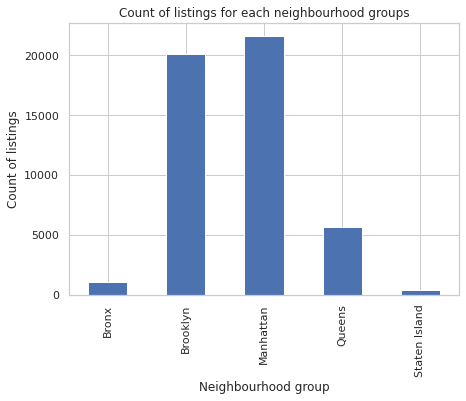

In [39]:
# Plotting above dataframe(listing_area)
plt.figure(figsize = (7,5))
new_data['calculated_host_listings_count'].groupby(new_data['neighbourhood_group']).count().plot.bar()
plt.xlabel('Neighbourhood group')
plt.ylabel('Count of listings')
plt.title('Count of listings for each neighbourhood groups')

From the above dataframe and bar chart, we can say that Manhattan has high count of listings and the least is Staten Island.

In [40]:
# Calculating the count of listings for each room type
listing_room = new_data['calculated_host_listings_count'].groupby(new_data['room_type']).count().reset_index()
listing_room = listing_room.sort_values(by = 'calculated_host_listings_count', ascending = False)
listing_room

,room_type,calculated_host_listings_count
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


Text(0.5, 1.0, 'Count of listings for each room types')

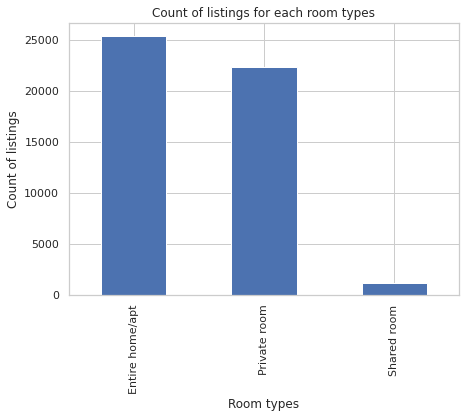

In [41]:
# Plotting above dataframe(listing_area)
plt.figure(figsize = (7,5))
new_data['calculated_host_listings_count'].groupby(new_data['room_type']).count().plot.bar()
plt.xlabel('Room types')
plt.ylabel('Count of listings')
plt.title('Count of listings for each room types')

From the above dataframe and bar chart we can say that, host listing count is higher for Entire home/apt followed by Private room 

In [42]:
# Creating dataframe that contains total number of reviews for particular neighbourhood group
reviews_area = new_data['number_of_reviews'].groupby(new_data['neighbourhood_group']).sum().reset_index()
reviews_area = reviews_area.sort_values(by = 'number_of_reviews', ascending = False)
reviews_area

,neighbourhood_group,number_of_reviews
1,Brooklyn,486174
2,Manhattan,454126
3,Queens,156902
0,Bronx,28334
4,Staten Island,11541


Text(0.5, 1.0, 'Total no.of reviews for neighbourhood groups')

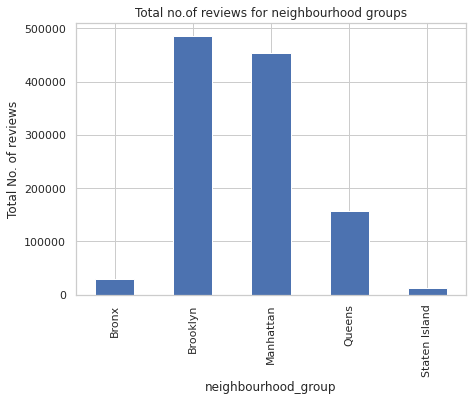

In [43]:
# Plotting above dataframe(reviews_area)
plt.figure(figsize = (7,5))
new_data['number_of_reviews'].groupby(new_data['neighbourhood_group']).sum().plot.bar()
plt.ylabel('Total No. of reviews')
plt.title('Total no.of reviews for neighbourhood groups')

Here we can see that Brooklyn has highest number of reviews and least is Staten Island

In [44]:
# Creating dataframe that contains total number of reviews for particular room type
reviews_room = new_data['number_of_reviews'].groupby(new_data['room_type']).sum().reset_index()
reviews_room = reviews_room.sort_values(by = 'number_of_reviews', ascending = False)
reviews_room

,room_type,number_of_reviews
0,Entire home/apt,579856
1,Private room,537965
2,Shared room,19256


Text(0.5, 1.0, 'Total no.of reviews for room types')

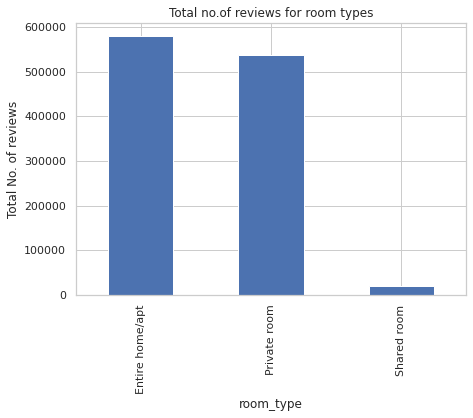

In [45]:
# Plotting above dataframe(reviews_room)
plt.figure(figsize = (7,5))
new_data['number_of_reviews'].groupby(new_data['room_type']).sum().plot.bar()
plt.ylabel('Total No. of reviews')
plt.title('Total no.of reviews for room types')

Here, we can see that Entire home/apt has highest number of reviews

In [46]:
# Creating dataframe that contains total number of minimum_nights for particular neighbourhood_group
min_nights_area = new_data.groupby(['neighbourhood_group'])['minimum_nights'].sum().reset_index()
min_nights_area = min_nights_area.sort_values(by = 'minimum_nights', ascending = False)
min_nights_area

,neighbourhood_group,minimum_nights
2,Manhattan,184792
1,Brooklyn,121693
3,Queens,29356
0,Bronx,4971
4,Staten Island,1802


Text(0.5, 1.0, 'Total no.of nights people stayed for various neighbourhood groups')

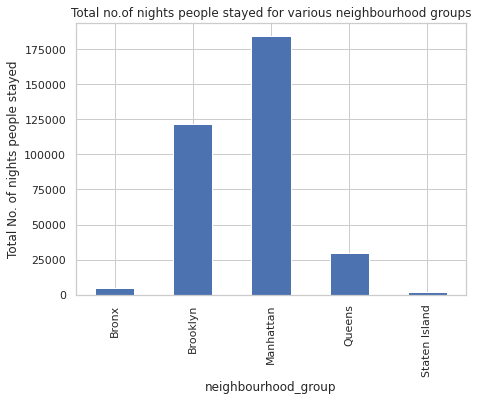

In [47]:
# Plotting above dataframe(min_nights_area)
plt.figure(figsize = (7,5))
new_data.groupby(['neighbourhood_group'])['minimum_nights'].sum().plot.bar()
plt.ylabel('Total No. of nights people stayed')
plt.title('Total no.of nights people stayed for various neighbourhood groups')

From the above dataframe and bar chart, we can say Manhattan has more night stays

In [48]:
# Creating dataframe that contains total number of minimum_nights for particular room type
min_nights_room = new_data.groupby(['room_type'])['minimum_nights'].sum().reset_index()
min_nights_room = min_nights_room.sort_values(by = 'minimum_nights', ascending = False)
min_nights_room

,room_type,minimum_nights
0,Entire home/apt,215081
1,Private room,120023
2,Shared room,7510


Text(0.5, 1.0, 'Total no.of nights people stayed for various room types')

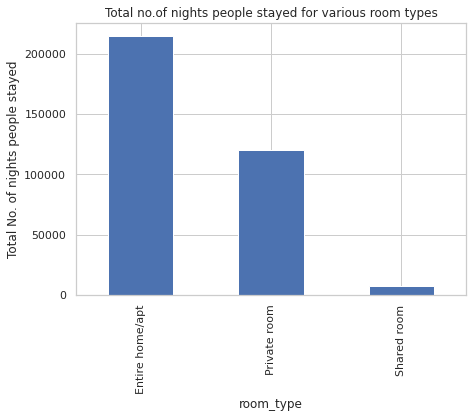

In [49]:

# Plotting above dataframe(min_nights_room)
plt.figure(figsize = (7,5))
new_data.groupby(['room_type'])['minimum_nights'].sum().plot.bar()
plt.ylabel('Total No. of nights people stayed')
plt.title('Total no.of nights people stayed for various room types')

From above dataframe and bar chart, we can say that Entire home/apt has more night stays and least is Shared room

In [50]:
# Function which takes feature as arguement and shows visualization of comparison between various room types across neighbourhood_group
def comparison(feature):
  if feature == 'price':
    grouped_data = new_data.groupby(['neighbourhood_group','room_type'])[feature].mean().reset_index()
  elif feature == 'number_of_reviews' or feature == 'minimum_nights':
    grouped_data = new_data.groupby(['neighbourhood_group','room_type'])[feature].sum().reset_index()
  elif feature == 'calculated_host_listings_count':
    grouped_data = new_data.groupby(['neighbourhood_group','room_type'])[feature].count().reset_index()
  entire = grouped_data[grouped_data['room_type'] == 'Entire home/apt']
  private = grouped_data[grouped_data['room_type'] == 'Private room']
  shared = grouped_data[grouped_data['room_type'] == 'Shared room']
  plt.figure(figsize = (15,10))
  width = 0.2  #assigning width

  # LOCATIONS TO PLOT
  entire_bar = np.arange(len(grouped_data['neighbourhood_group'].unique()))
  private_bar = [i+width for i in entire_bar]
  shared_bar = [i+width for i in private_bar]

  plt.bar(entire_bar, entire[feature], width = width, label = 'Entire Home' )
  plt.bar(private_bar, private[feature], width = width, label = 'Private Room' )
  plt.bar(shared_bar, shared[feature], width = width, label = 'Shared Room' )
  plt.xticks(entire_bar+width + width/2 , entire['neighbourhood_group'])
  plt.xlabel('neighbourhood group')
  plt.ylabel(f'Average {feature}')
  plt.title(f'Comparision of {feature} for various room types across neighbourhood groups')
  plt.legend()
  plt.show()


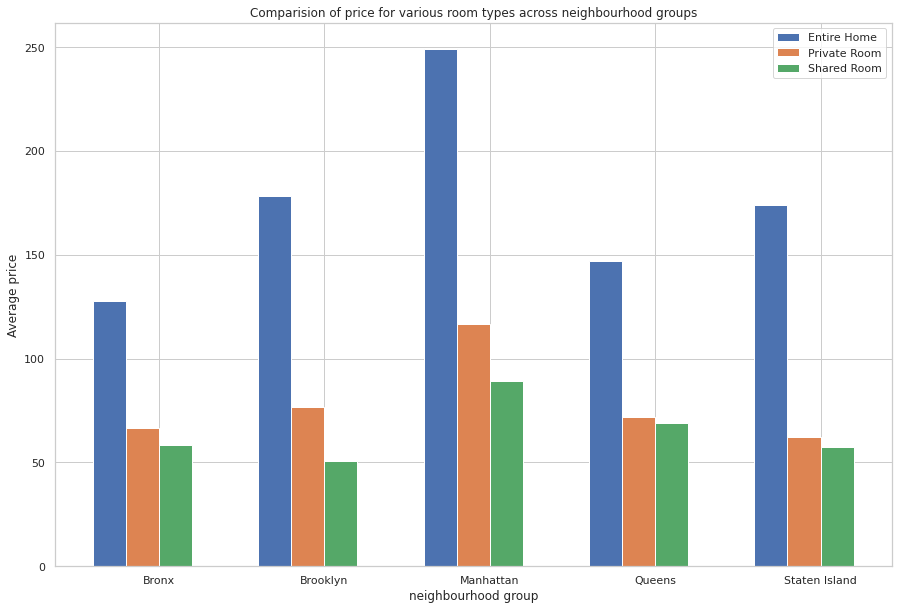

In [51]:
# Price comparison 
comparison('price')

As we know Manhattan has highest average price. In Manhattan, entire home/apt has highest average price. Similarly, we can see comparison between the average price for room types across each neighborhood groups.

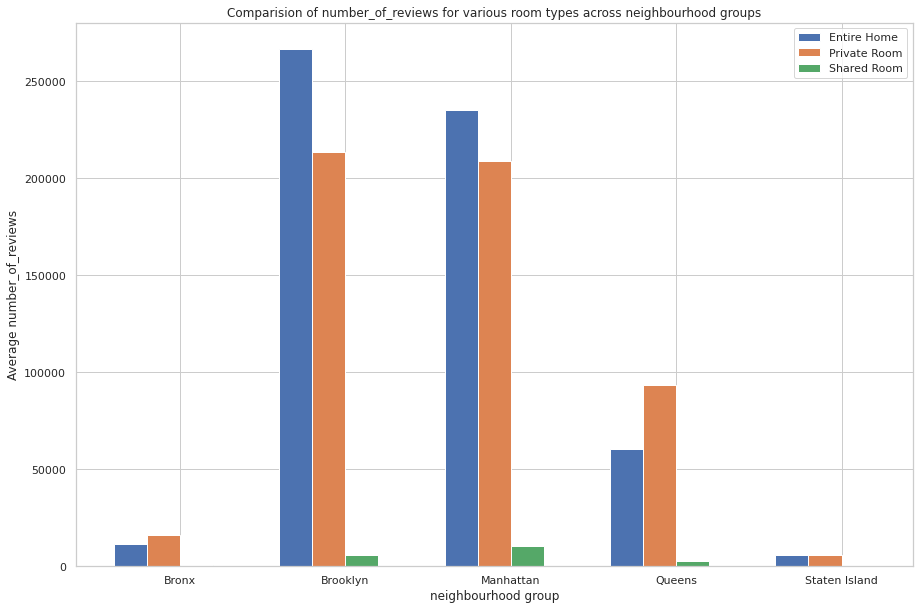

In [52]:
# number of reviews comparison 
comparison('number_of_reviews')

As we know Brooklyn has highest number of reviews. In Brooklyn, entire home/apt has highest number of reviews. Similarly, we can see comparison between the number of reviews for room types across each neighborhood groups

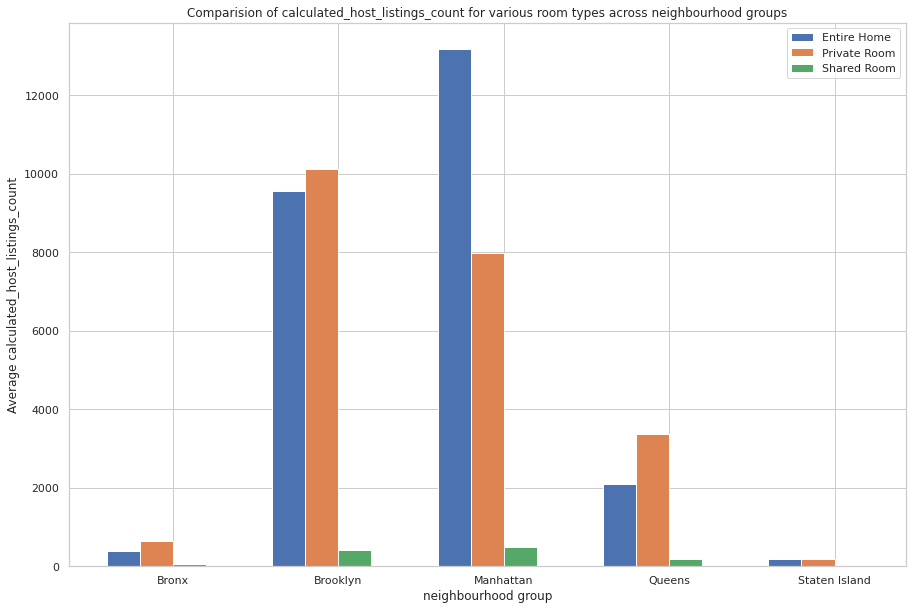

In [53]:
# listing counts comparison 
comparison('calculated_host_listings_count')

As we know Manhattan has highest number of host listings. In Manhattan, entire home/apt has highest number of reviews. Similarly, we can see comparison between the number of host listings for room types across each neighborhood groups

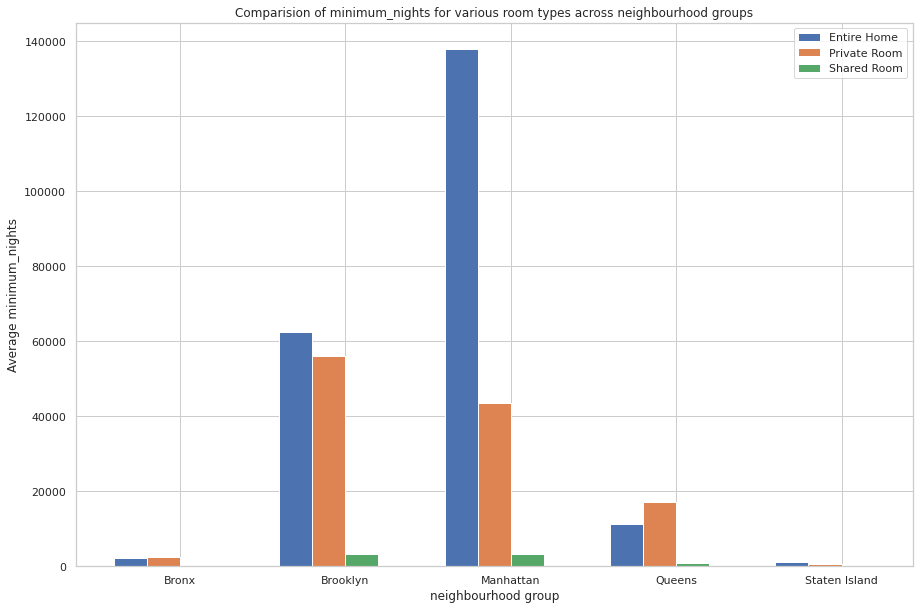

In [54]:
# comparison of minimum nights
comparison('minimum_nights')

As we know Manhattan has highest number of night stays. In Manhattan, entire home/apt has highest number of night stays. Similarly, we can see comparison between the number of night stays for room types across each neighborhood groups

**What can we learn about different hosts and areas?**

In [55]:
host_area = new_data.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
host_area = host_area.sort_values(by = 'calculated_host_listings_count', ascending=False).head(10).reset_index()
host_area

,index,host_name,neighbourhood_group,calculated_host_listings_count
0,13214,Sonder (NYC),Manhattan,327
1,1833,Blueground,Manhattan,230
2,9740,Michael,Manhattan,212
3,3249,David,Manhattan,202
4,9739,Michael,Brooklyn,159
5,6806,John,Manhattan,151
6,3248,David,Brooklyn,142
7,7273,Kara,Manhattan,135
8,9853,Mike,Manhattan,134
9,432,Alex,Manhattan,134


The above dataframe contains the host names with most number of listings (top 10)

In [56]:
area_rev = new_data.groupby(['name', 'neighbourhood_group','price', 'minimum_nights'])['number_of_reviews'].sum().reset_index()
area_rev.sort_values(by = 'price', ascending = False)

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
20210,Furnished room in Astoria apartment,Queens,10000,100,2
1110,1-BR Lincoln Center,Manhattan,10000,30,0
27212,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5,5
2222,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999,30,0
36139,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,99,6
...,...,...,...,...,...
17012,Cozy yet spacious private brownstone bedroom,Brooklyn,0,1,95
48199,the best you can find,Manhattan,0,3,0
12948,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,0,30,2
27908,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,0,2,16


The above dataframe consists of listings with high price and their minimum night stays and also reviews 

Busiest hosts

**Which hosts are the busiest and why?**

In [57]:
# Creating dataframe that includes host names with high number of mimimum stays
busy_host = new_data.groupby(['host_name', 'neighbourhood_group', 'room_type'])['minimum_nights'].sum().reset_index()
busy_host = busy_host.sort_values(by = 'minimum_nights', ascending=False).head(10).reset_index()
busy_host

,index,host_name,neighbourhood_group,room_type,minimum_nights
0,2294,Blueground,Manhattan,Entire home/apt,7410
1,16545,Sonder (NYC),Manhattan,Entire home/apt,4337
2,9188,Kara,Manhattan,Entire home/apt,3786
3,12296,Michael,Manhattan,Entire home/apt,3262
4,8224,Jeremy & Laura,Manhattan,Entire home/apt,2850
5,16544,Sonder,Manhattan,Entire home/apt,2784
6,3679,Corporate Housing,Manhattan,Entire home/apt,2760
7,9547,Ken,Manhattan,Entire home/apt,2636
8,9466,Kazuya,Queens,Private room,2370
9,14325,Pranjal,Manhattan,Entire home/apt,2190


From the above dataframe, the values in host_name column are the busiest hosts because they are from Manhattan and they has high number of night stays 

In [58]:
host = []
for i in range(len(busy_host)):
  host.append(busy_host.loc[i, 'host_name'])
print(f'The busiest hosts are {", ".join(host)}')

The busiest hosts are Blueground, Sonder (NYC), Kara, Michael, Jeremy & Laura, Sonder, Corporate Housing, Ken, Kazuya, Pranjal


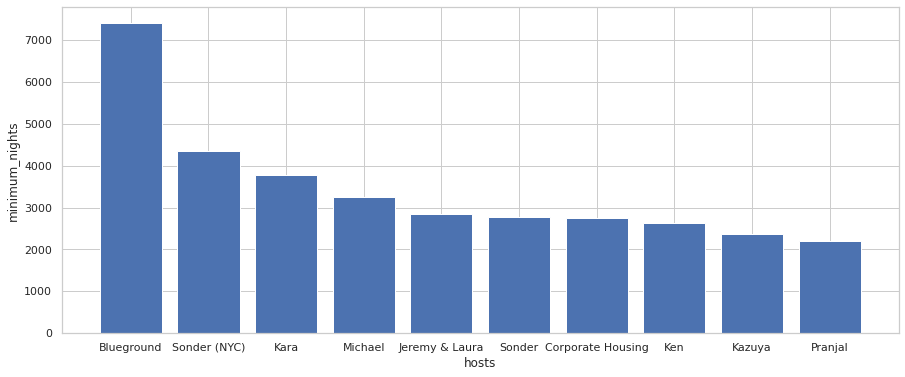

In [59]:
# Plotting the above dataframe(busy_host)
plt.figure(figsize = (15,6))
plt.bar(busy_host['host_name'], busy_host['minimum_nights'])
plt.xlabel('hosts')
plt.ylabel('minimum_nights')
plt.show()

**Traffic area**

**Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [60]:
# Creating a dataframe which consists of minimum nights with respect to each neighbourhood group and room type
traffic_area = new_data.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].sum().reset_index()
traffic_area

,neighbourhood_group,room_type,minimum_nights
0,Bronx,Entire home/apt,2254
1,Bronx,Private room,2516
2,Bronx,Shared room,201
3,Brooklyn,Entire home/apt,62393
4,Brooklyn,Private room,56098
5,Brooklyn,Shared room,3202
6,Manhattan,Entire home/apt,138081
7,Manhattan,Private room,43463
8,Manhattan,Shared room,3248
9,Queens,Entire home/apt,11255


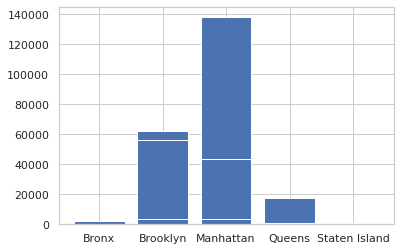

In [61]:
# plotting the above dataframe (traffic_area)
plt.bar(traffic_area['neighbourhood_group'], traffic_area['minimum_nights'])
plt.show()

From the above dataframe and barchart, we can say that there is a noticeable difference of traffic among different areas

In [62]:
# Function which takes feature as argument and prints top 10 host names according to the given feature
def highest(feature):
  top = new_data.nlargest(10, [feature]).reset_index()
  host_name = []
  for i in range(len(top)):
    host_name.append(top.loc[i, 'host_name'])
  print(f'The top 10 hosts with most {feature} are {", ".join(host_name)}')

In [63]:
# Top 10 hosts
highest('number_of_reviews')
highest('minimum_nights')
highest('price')
highest('calculated_host_listings_count')

The top 10 hosts with most number_of_reviews are Dona, Jj, Jj, Jj, Dona, Maya, Carol, Danielle, Asa, Wanda
The top 10 hosts with most minimum_nights are Genevieve, Glenn H., Angie, Meg, Aliya, John, Laura, Amanda, Meg, Shining
The top 10 hosts with most price are Kathrine, Erin, Jelena, Olson, Amy, Matt, Rum, Jessica, Sally, Jack
The top 10 hosts with most calculated_host_listings_count are Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC), Sonder (NYC)


In [64]:
df_365 = new_data[new_data['availability_365'] == 365]
print(f'There are total of {df_365.shape[0]} listings that are available for 365 days')

There are total of 1294 listings that are available for 365 days


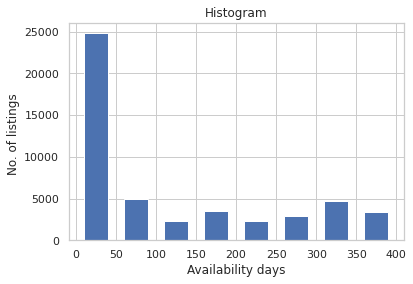

In [65]:
#Plotting histogram Availability days vs No. of listings
avail = new_data['availability_365']
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
plt.hist(avail, bins, rwidth=0.6)
plt.xlabel('Availability days')
plt.ylabel('No. of listings ')
plt.title('Histogram')
plt.show()

From the above histogram, we can say that a most number of listings are available for only less than 50days.

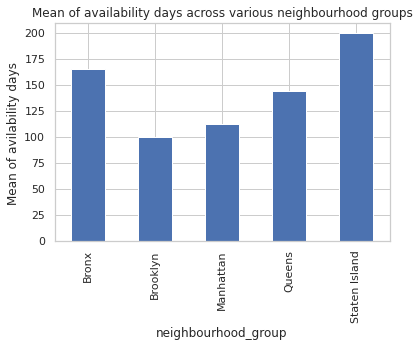

In [66]:
# Plotting barchart 
new_data.groupby('neighbourhood_group')['availability_365'].mean().plot.bar()
plt.ylabel('Mean of avilability days ')
plt.title('Mean of availability days across various neighbourhood groups')
plt.show()

From the above chart we can see that Staten Island has availability of rooms with more number of days

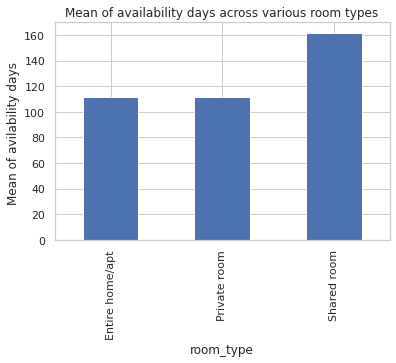

In [67]:
# Plotting barchart 
new_data.groupby('room_type')['availability_365'].mean().plot.bar()
plt.ylabel('Mean of avilability days ')
plt.title('Mean of availability days across various room types')
plt.show()

From the above chart we can see that shared room category has availability of rooms with more number of days

# **Final Conclusion**

From the above analysis, we can conclude that 




*   Most people are prefering Manhattan and Brooklyn, and the least is Staten Island


*   The areas with most number of listings are ['Williamsburg' 'Bedford-Stuyvesant' 'Harlem' 'Bushwick' 'Upper West Side'
 "Hell's Kitchen" 'East Village' 'Upper East Side' 'Crown Heights'
 'Midtown']
   



*   Most people are prefering Entire home/apt followed by Private room and least is Shared room


*   The price of listings are mostly in the range of 0 to 1000 and a few listings are in range of 1000 to 10000

*   The number of listings with price less than 1000 are 48619

*   The number of listings with price more than 1000 are 239


*   Manhattan area has the highest average price and the least is Bronx

*   Entire home/apt has highest average price than others
*   Manhattan has the high count of listings and the least is Staten Island.


*   Brooklyn has the highest number of reviews and the least is Staten Island


*   Entire home/apt has the highest number of reviews


*   Manhattan has more night stays and the least is Staten Island

*   Entire home/apt has more night stays and the least is Shared room
*   The top hosts with most number_of_reviews are Dona, Maya, Carol, Danielle, Asa, Wanda

*   The top hosts with most minimum_nights are Genevieve, Glenn H., Angie, Meg, Aliya, John, Laura, Amanda, Meg, Shining
*   The top hosts with most price are Kathrine, Erin, Jelena, Olson, Amy, Matt, Rum, Jessica, Sally, Jack
 
*   The top host with most calculated_host_listings_count are Sonder (NYC).
*   The busiest hosts are Blueground, Sonder (NYC), Kara, Michael, Jeremy & Laura, Sonder, Corporate Housing, Ken, Kazuya, Pranjal

*   There are total of 1294 listings that are available for 365 days.


*   The shared room category has availability of rooms with more number of days
*   Staten Island has availability of rooms with more number of days





